In [5]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Chargement des données
data = pd.read_excel('Fromage.xlsx')

# Description des données
print(data.describe())




         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines      cholesterol   magnesium  
count      29.000000     29.000000  29.000000  
mean       20.168966     74.586207  26.965517  
std         6.959788     28.245755  11.318388  
min         4.100000     10.000000  10.000000  
25%        17.800000     70.000000  20.000000  


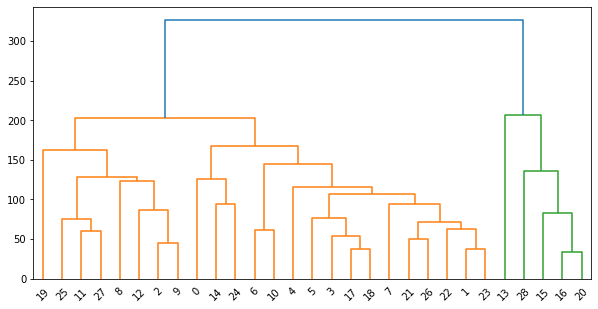

C:\Users\arwa ghazouani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arwa ghazouani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


           calories      sodium     calcium    lipides    retinol    folates  \
cluster                                                                        
0        364.222222  158.333333  257.800000  29.022222  61.955556   4.066667   
1        122.600000   67.800000  121.560000   8.720000  74.220000  19.380000   
2        320.666667  288.566667  163.886667  26.386667  68.706667  16.253333   

         proteines      cholesterol   magnesium   Babybel  ...  Parmesan  \
cluster                                                    ...             
0            26.166667     95.555556  37.888889  0.000000  ...  0.111111   
1             7.980000     24.600000  12.200000  0.000000  ...  0.000000   
2            20.633333     78.666667  25.333333  0.066667  ...  0.000000   

         Petitsuisse40  PontlEveque  Pyrenees  Reblochon  Rocquefort  \
cluster                                                                
0                  0.0     0.000000  0.000000   0.000000    0.000000   
1 

C:\Users\arwa ghazouani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arwa ghazouani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arwa ghazouani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arwa ghazouani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

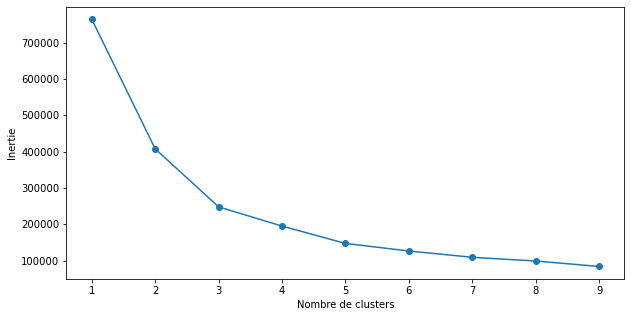

In [6]:
# Encode non-numeric values using one-hot encoding
data = pd.get_dummies(data, prefix="", prefix_sep="")

# Classification ascendante hiérarchique
Z = linkage(data, method="average")
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=data.index)
plt.show()

# Méthode des centres mobiles (k-means)
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
data["cluster"] = kmeans.labels_
print(data.groupby("cluster").mean())

# Détection du nombre adéquat de classes
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()